# Classical Mechanics Problem 4.33

Problem statement from the book (pg. 155):

>Verify the expression (4.59) for the potential energy of the cube balaned on a cylinder in  Example 4.7 (page 130). Make plots of U($\theta$) for $b = 0.9r$ and $b = 1.1r$. (You may as well choose units such that $r$, $m$ and $g$ are all equal to 1.) Use your plots to confirm the findings of Example 4.7 concerning the stability of the equilibrium at $\theta = 0$. Are there any other equilibrium points and are they stable?

Expression 4.59:

$$
    U(\theta) = m g h = m g [ ( r + b ) cos \theta + r \theta sin \theta ]
$$

Example 4.7. A hard rubber cylinder of radius _r_ is held fixed with its axis horizontal, and a wooden cube of mass _m_ and side 2b is balanced on top of the cylinder. By examining the cube's potential energy, we found that the cube and cylinder were not a stable system at $\theta = 0$.

<img src="Images/Chapter4Image1.png" alt="drawing" style="display: block; margin-left: auto; margin-right: auto; width: 50%;"/>

## Generalizing the Equation

Knowing that $b$ will be a multiple of $r$, we can rewrite the equation like so:

$$
U(\theta) = mgr[(1 + \frac{b}{r})cos(\theta) + \theta sin(\theta)]
$$

Supposing that $r = m = g = 0$, we can rewrite it:

$$
\mathbf{U(\theta) = (1 + b)cos(\theta) + \theta sin(\theta)}
$$

## Graphing the Result

In this case, we will use `matplotlib` as usual, along with `numpy`. Numpy makes it really easy to handle functions, because of its ability to pass, multiply, and do other operations on arrays that would otherwise be illegal in native python. For example, below I have code that calculates the sine and cosine of theta. Instead of needing to loop through all of the values of theta and using `math.cos()` or `math.sin()` to calculate each one individually, then recombining them into one array again, I am able to use `np.cos()` and `np.sin()` to straightforwardly calculate the functions for all of the values, which gets stored back into a numpy array. At first its a bit confusing, if you don't know what's going on with the numpy library, but it turns out to be super helpful for readability. I am able to essentially write out the exact mathematical function in the code. It looks like this:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def potentialEnergy(b, thetaMin, thetaMax):
    theta = np.arange(thetaMin, thetaMax, 0.1)
    potentialEnergy = (1 + b)*np.cos(theta) + theta*np.sin(theta)
    return (theta, potentialEnergy)

def graphU(func, title):
    plt.title(title)
    plt.plot(func[0],func[1], 'r')
    plt.xlabel("theta (radians)")
    plt.ylabel("potential energy")

### b = 0.9

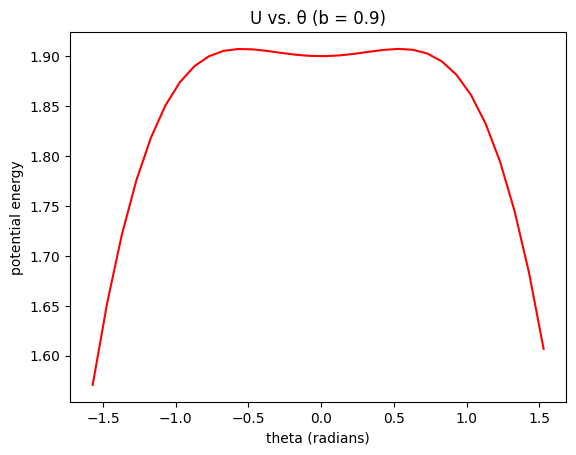

In [2]:
func = potentialEnergy(0.9, -0.5*np.pi, 0.5*np.pi)
graphU(func, "U vs. θ (b = 0.9)")

### b = 1.1

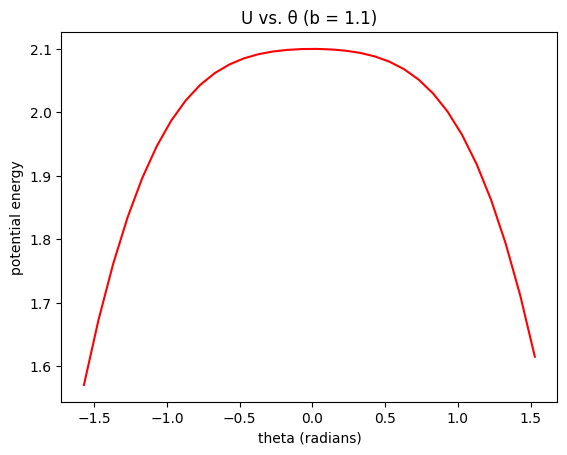

In [3]:
func = potentialEnergy(1.1, -0.5*np.pi, 0.5*np.pi)
graphU(func, "U vs. θ (b = 1.1)")

## Analysis

- In the case of $b < r$, the state at $\theta = 0$ has slight positive concavity. This means that there is a small bit of stability when the length of the sides of the cube is less than the diameter of the cylinder.

- In the case of $b > r$, there is no positive concavity at $\theta = 0$. This means that the system is unstable when the length of the sides of the cube is larger than the diameter of the cylinder.


This is the exact same conclusion that the example in the textbook came to. 

## Looking for More Equilibriua

Now, we must look for more instances of equilibria. Naturally, we'll look to longer ranges of theta:

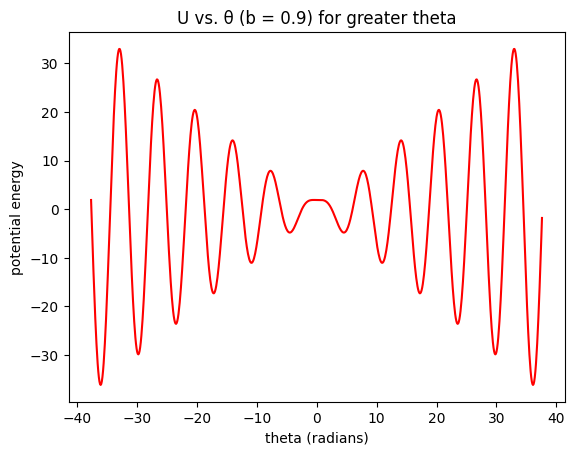

In [4]:
func = potentialEnergy(0.9, -12*np.pi, 12*np.pi)
graphU(func, "U vs. θ (b = 0.9) for greater theta")

Now this is quite interesting. There seem to be more equilibria at higher $|\theta|$. But we must ask ourselves: what makes physical sense? Physically, the state of the block at $\theta = -\pi$ should be the same as at $\theta = \pi$. So we should limit theta to $ -\pi \leq \theta \leq \pi$

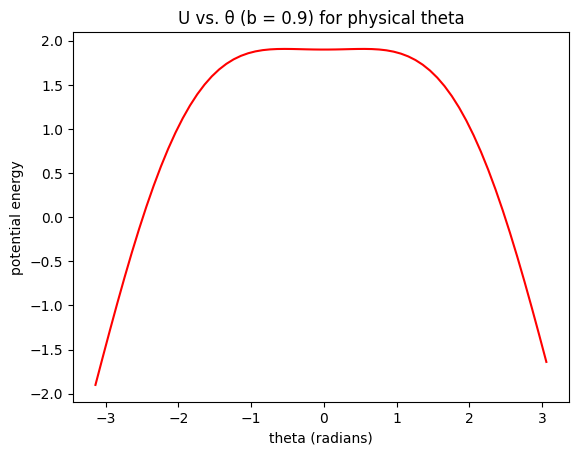

In [5]:
func = potentialEnergy(0.9, -np.pi, np.pi)
graphU(func, "U vs. θ (b = 0.9) for physical theta")

We see that the only other equilibrium is at $|\theta|=\pi$, when the block is _underneath_ the cylinder. Note that the equilibria in the other graph are misleading because the potential energy function is formulated on the assumption that theta is measured from vertical, down to vertical, and no further, meaning $-\pi\leq\theta\leq\pi$.